# Deep Learning Tensorflow/Keras approach 
    -> Ressources: 
    https://towardsdatascience.com/building-a-multi-output-convolutional-neural-network-with-keras-ed24c7bc1178
    https://keras.io/guides/functional_api/
    (Multi-Output-Network)

In [14]:
import pandas as pd

df = pd.read_csv("../static_merged_data.csv")
df.head()


,T_min,T_max,T_delta,Pow_mean,status
0,24.559295,27.063301,2.504006,0.0,drossel
1,24.559295,27.063301,2.504006,0.0,drossel
2,24.559295,27.063301,2.504006,0.0,drossel
3,24.559295,27.063301,2.504006,0.0,drossel
4,24.559295,27.063301,2.504006,0.0,drossel


In [83]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# devide it into labels and features
Y = df[["status"]]
X = df[["T_min","T_max","T_delta","Pow_mean"]]

# split the dataset into train- and testset
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=.2)

#y_categ = to_categorical(Y,3) #does not work: only integers
Y.head()

,status
0,drossel
1,drossel
2,drossel
3,drossel
4,drossel


In [103]:
from keras.utils import to_categorical
pd_series_nums = y_train.status.astype('category').cat.codes.to_numpy()
labels = to_categorical(pd_series_nums, 3)
labels.shape

(77079, 3)

In [104]:
X_numpy = X_train.to_numpy()
#X_numpy.resize(96349,1,4)
X_numpy.shape

(77079, 4)

In [107]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from  keras import Sequential

model = Sequential([
    Input(shape=(4,), name="input-layer"),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(3, activation="softmax", name="output_layer")
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                160       
                                                                 
 dense_64 (Dense)            (None, 64)                2112      
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 3)                 51        
                                                                 
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________


In [109]:
from keras.losses import CategoricalCrossentropy
model.compile(optimizer="rmsprop", loss=CategoricalCrossentropy(), metrics=["acc"])

history = model.fit(X_numpy, labels, 128, 32, validation_split=0.1)

Epoch 1/32
542/542 [==============================] - 2s 2ms/step - loss: 0.2730 - acc: 0.8920 - val_loss: 0.1828 - val_acc: 0.9346
Epoch 2/32
542/542 [==============================] - 1s 2ms/step - loss: 0.2542 - acc: 0.8957 - val_loss: 0.2609 - val_acc: 0.8810
Epoch 3/32
542/542 [==============================] - 1s 2ms/step - loss: 0.2477 - acc: 0.8978 - val_loss: 0.1886 - val_acc: 0.9089
Epoch 4/32
542/542 [==============================] - 1s 2ms/step - loss: 0.2435 - acc: 0.9004 - val_loss: 0.1779 - val_acc: 0.9360
Epoch 5/32
542/542 [==============================] - 1s 2ms/step - loss: 0.2380 - acc: 0.9008 - val_loss: 0.3288 - val_acc: 0.8317
Epoch 6/32
542/542 [==============================] - 1s 2ms/step - loss: 0.2300 - acc: 0.9050 - val_loss: 0.1833 - val_acc: 0.9262
Epoch 7/32
542/542 [==============================] - 1s 1ms/step - loss: 0.2257 - acc: 0.9049 - val_loss: 0.1663 - val_acc: 0.9445
Epoch 8/32
542/542 [==============================] - 1s 2ms/step - loss: 0.

In [114]:
import matplotlib.pyplot as plt

def plot_history(history, epochs_size):
    loss = history.history["loss"]
    accuracy = history.history["acc"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_acc"]
    # max_acc = accuracy[np.argmax(accuracy)]
    # max_val_acc = val_accuracy[np.argmax(val_accuracy)]
    epochs = range(1, (epochs_size+1))
    ig, ax = plt.subplots(2, figsize=(20, 8))
    ax[0].plot(epochs ,loss, "b", label="Training loss")
    ax[0].plot(epochs, val_loss, "r", label="Validation loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("%")
    ax[0].set_title("Loss of Model:")
    ax[0].legend()
    ax[1].plot(epochs, accuracy, "g", label="Training accuracy")
    ax[1].plot(epochs, val_accuracy, "y", label="Validation accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("%")
    ax[1].set_title("Accuracy of Model:")
    ax[1].legend()

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.8)

    plt.show()
    

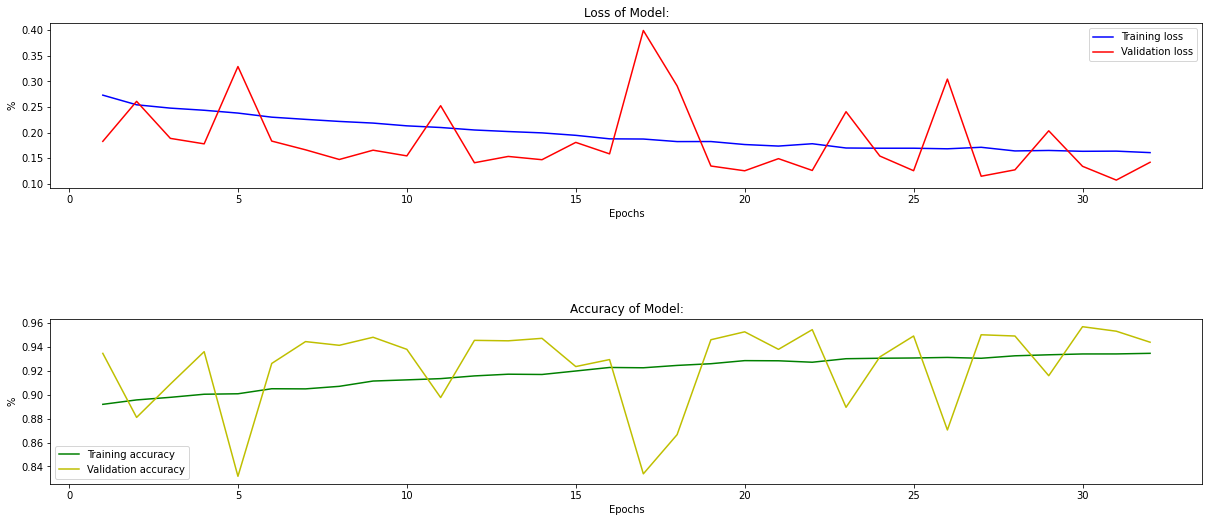

In [115]:
plot_history(history=history, epochs_size=32)

In [6]:
dataset_dict = {
    'song': {
        0: 'neelix', 
        1: 'ng', 
        2: 'pieces'
    },

    'dcdc': {
        0: 'mosfets',
        1: 'normal',
        2: 'drossel'
    }
}
dataset_dict['song_alias'] = dict((g, i) for i, g in dataset_dict['song'].items())
dataset_dict['dcdc_alias'] = dict((r, i) for i, r in dataset_dict['dcdc'].items())
print(dataset_dict)

IM_WIDTH = 321 
IM_HEIGHT = 123

{'song': {0: 'neelix', 1: 'ng', 2: 'pieces'}, 'dcdc': {0: 'mosfets', 1: 'normal', 2: 'drossel'}, 'song_alias': {'neelix': 0, 'ng': 1, 'pieces': 2}, 'dcdc_alias': {'mosfets': 0, 'normal': 1, 'drossel': 2}}


In [7]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
class UtkMultiOutputModel():
    """
    Used to generate our multi-output model. This CNN contains three branches, one for age, other for 
    sex and another for race. Each branch contains a sequence of Convolutional Layers that is defined
    on the make_default_hidden_layers method.
    """
    def make_default_hidden_layers(self, inputs):
        """
        Used to generate a default set of hidden layers. The structure used in this network is defined as:
        
        Conv2D -> BatchNormalization -> Pooling -> Dropout
        """
        x = Conv2D(16, (3, 3), padding="same")(inputs)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(3, 3))(x)
        x = Dropout(0.25)(x)
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        return x
    def build_race_branch(self, inputs, num_races):
        """
        Used to build the race branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = self.make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_races)(x)
        x = Activation("softmax", name="race_output")(x)
        return x
    def build_gender_branch(self, inputs, num_genders=2):
        """
        Used to build the gender branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)
        x = self.make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_genders)(x)
        x = Activation("sigmoid", name="gender_output")(x)
        return x
    def build_age_branch(self, inputs):   
        """
        Used to build the age branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = self.make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="age_output")(x)
        return x
    def assemble_full_model(self, width, height, num_races):
        """
        Used to assemble our multi-output model CNN.
        """
        input_shape = (height, width, 3)
        inputs = Input(shape=input_shape)
        age_branch = self.build_age_branch(inputs)
        race_branch = self.build_race_branch(inputs, num_races)
        gender_branch = self.build_gender_branch(inputs)
        model = Model(inputs=inputs,
                     outputs = [age_branch, race_branch, gender_branch],
                     name="face_net")
        return model
    
model = UtkMultiOutputModel().assemble_full_model(IM_WIDTH, IM_HEIGHT, num_races=len(dataset_dict['race_alias']))

KeyError: 'race_alias'